# Notebook for appendix figures

## Importing of google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## R Loading

In [2]:
%reload_ext rpy2.ipython

In [3]:
%%R
lib_loc <- "/content/drive/Shareddrives/Bovi-Analytics/R-lib/"

In [4]:
%%R
.packages <- c("ggplot2",
                  "readr",
                  "plyr",
                  "dplyr",
                  "tidyr",
                  "tibble",
                  "lme4",
                  "lmerTest",
                  "multcompView",
                  "mvtnorm",
                  "TH.data",
                  "multcomp",
                  "emmeans",
                  "lsmeans",
                  "carData",
                  "car",
                  "stringr",
                  "cAIC4",
                  "ggrepel",
                  "geomtextpath",
                  "grid",
                  "sandwich",
                  "clubSandwich",
                  "skimr",
                  "purrr",
                  'cowplot',
                  "ggpubr"
                  )

# Install CRAN packages (if not already installed)
.inst <- .packages %in% installed.packages(lib.loc=lib_loc)
if(length(.packages[!.inst]) > 0) install.packages(.packages[!.inst], lib=lib_loc, repos = "http://cran.us.r-project.org")

# Load packages into session
lapply(.packages, require, character.only=TRUE, lib.loc = lib_loc, quietly = TRUE)

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE




Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘Matrix’

The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select


Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser

Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'
The 'lsmeans' package is now basically a front end for 'emmeans'.
Users are encouraged to s

# EatingTime

In [5]:
%%R
load(file="/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Kemel2025a/Models/finalmodelEatingtimeperDay.rdata")

In [8]:
%%R
myLoc <-
  (which(levels(dfLMSs$DaysInMilk) == "-1") +
     which(levels(dfLMSs$DaysInMilk) == "1")) /
  2

## HerdIdentifier

Cannot find directory
'/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Kemel2025a/Figures/Apendix'.
ℹ Would you like to create a new directory?

1: Yes
2: No

Selection: y
Enter an item from the menu, or 0 to exit
Selection: 1
✔ Created directory: '/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Kemel2025a/Figures/Apendix'.


Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 97916' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 97916)' or larger];
but be warned that this may result in large computation time and memory use.
Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 97916' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 97916)' or larger];
but be warned that this may result in large computation time and memory use.
In addition: Warning message:
Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 


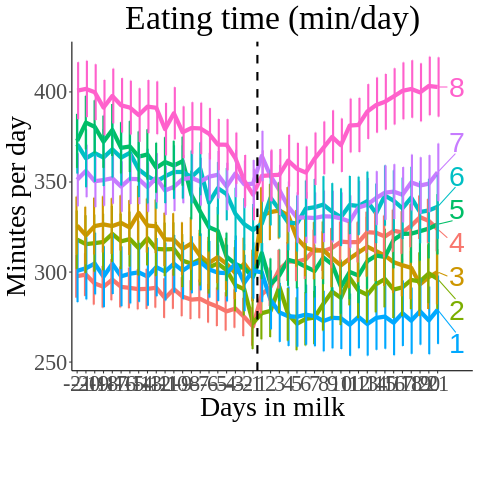

In [9]:
%%R
LSMs<-lsmeans::lsmeans(finalModel, pairwise ~ HerdIdentifier|DaysInMilk, type = "response", glhargs=list())
dfLMSs <- multcomp::cld(LSMs[[1]], alpha=0.05, Letters=letters, adjust="sidak")

p = dfLMSs %>%  mutate(label = if_else(DaysInMilk == max(as.numeric(DaysInMilk)),
                                                                    as.character(HerdIdentifier), NA_character_)) %>%
  ggplot(
  aes(
    x=DaysInMilk,
    y=emmean,
    group=HerdIdentifier,
    color=HerdIdentifier)
    ) +
    #scale_fill_manual(values=group.colors)+
    geom_line(linewidth=2) +
    geom_text_repel(data= subset(dfLMSs,DaysInMilk == 21), aes(label =
                                 c("544" = "1",
                                  "2514" = "2",
                                  "3314" = "3",
                                  "2297" = "4",
                                  "5888" = "5",
                                  "3" = "6",
                                  "2011" = "7",
                                  "2746" = "8"),
                                 colour = HerdIdentifier,
                                 x = 42,
                                 y= emmean),hjust = -0.8, size = 10, nudge_x =4,box.padding = 0.5,direction = "y")+
    geom_errorbar(
    aes(ymin=asymp.LCL,
        ymax=asymp.UCL),
    width=0.25,
    linewidth=1,
    position=position_dodge(0.25)) +
  labs(
    title = "Eating time (min/day)",
    y="Minutes per day" ,
    x = "Days in milk") +
  theme_bw() +
  theme(text = element_text(family = "Times New Roman"),plot.margin = unit(c(0.5,0.5,4,0.5), "lines")) +
  theme(text=element_text(size=28),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"))+
  theme (legend.position= "none")+
  geom_vline(xintercept = myLoc, size = 1, linetype= "dashed", color ="black")



gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)
ggsave(plot = gt,"/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Kemel2025a/Figures/Apendix/EatingTimeHerdIdentifier.png", width = 24, height = 8)



## Parity

Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 97916' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 97916)' or larger];
but be warned that this may result in large computation time and memory use.
Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 97916' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 97916)' or larger];
but be warned that this may result in large computation time and memory use.


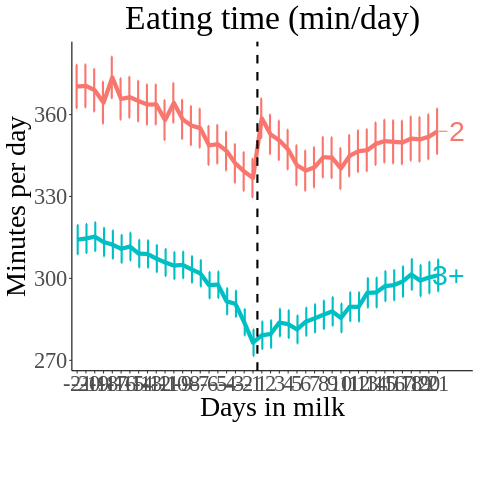

In [10]:
%%R
LSMs<-lsmeans::lsmeans(finalModel, pairwise ~ Parity|DaysInMilk, type = "response", glhargs=list())
dfLMSs <- multcomp::cld(LSMs[[1]], alpha=0.05, Letters=letters, adjust="sidak")


p = dfLMSs %>%  mutate(label = if_else(DaysInMilk == max(as.numeric(DaysInMilk)),
                                                                    as.character(Parity), NA_character_)) %>%
  ggplot(
  aes(
    x=DaysInMilk,
    y=emmean,
    group=Parity,
    color=Parity)
    ) +
    #scale_color_manual(values=group.colors)+
    #scale_fill_manual(values=group.colors)+
    geom_line(linewidth=2) +
    geom_text_repel(data= subset(dfLMSs,DaysInMilk == 21), aes(label = Parity, colour = Parity, x = 42, y= emmean),hjust = -0.8, size = 10, nudge_x =4,box.padding = 0.5,direction = "y")+
    geom_errorbar(
    aes(ymin=asymp.LCL,
        ymax=asymp.UCL),
    width=0.25,
    linewidth=1,
    position=position_dodge(0.25)) +
  labs(
    title = "Eating time (min/day)",
    y="Minutes per day" ,
    x = "Days in milk") +
  theme_bw() +
  theme(text = element_text(family = "Times New Roman"),plot.margin = unit(c(0.5,0.5,4,0.5), "lines")) +
  theme(text=element_text(size=28),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"))+
  theme (legend.position= "none")+
  geom_vline(xintercept = myLoc, size = 1, linetype= "dashed", color ="black")



gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)

ggsave(plot = gt,"/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Kemel2025a/Figures/Apendix/EatingTimeParity.png", width = 24, height = 8)


## CalvingSeason

Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 97916' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 97916)' or larger];
but be warned that this may result in large computation time and memory use.
Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 97916' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 97916)' or larger];
but be warned that this may result in large computation time and memory use.


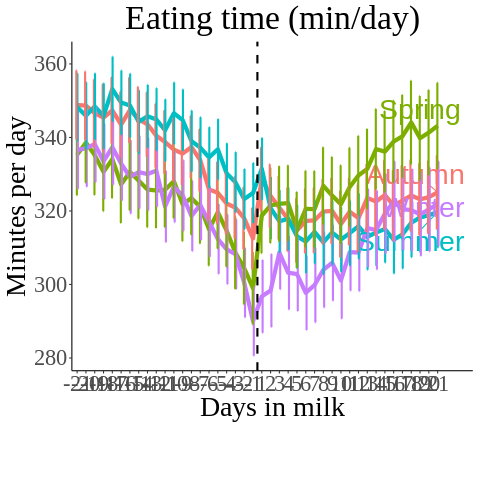

In [11]:
%%R
LSMs<-lsmeans::lsmeans(finalModel, pairwise ~ CalvingSeason|DaysInMilk, type = "response", glhargs=list())
dfLMSs <- multcomp::cld(LSMs[[1]], alpha=0.05, Letters=letters, adjust="sidak")


p = dfLMSs %>%  mutate(label = if_else(DaysInMilk == max(as.numeric(DaysInMilk)),
                                                                    as.character(CalvingSeason), NA_character_)) %>%
  ggplot(
  aes(
    x=DaysInMilk,
    y=emmean,
    group=CalvingSeason,
    color=CalvingSeason)
    ) +
    #scale_color_manual(values=group.colors)+
    #scale_fill_manual(values=group.colors)+
    geom_line(linewidth=2) +
    geom_text_repel(data= subset(dfLMSs,DaysInMilk == 21), aes(label = CalvingSeason, colour = CalvingSeason, x = 42, y= emmean),hjust = -0.8, size = 10, nudge_x =4,box.padding = 0.5,direction = "y")+
    geom_errorbar(
    aes(ymin=asymp.LCL,
        ymax=asymp.UCL),
    width=0.25,
    linewidth=1,
    position=position_dodge(0.25)) +
  labs(
    title = "Eating time (min/day)",
    y="Minutes per day" ,
    x = "Days in milk") +
  theme_bw() +
  theme(text = element_text(family = "Times New Roman"),plot.margin = unit(c(0.5,0.5,4,0.5), "lines")) +
  theme(text=element_text(size=28),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"))+
  theme (legend.position= "none")+
  geom_vline(xintercept = myLoc, size = 1, linetype= "dashed", color ="black")



gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)

ggsave(plot = gt,"/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Kemel2025a/Figures/Apendix/EatingTimeCalvingSeason.png", width = 24, height = 8)

#RuminationTime

In [13]:
%%R
load(file="/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Kemel2025a/Models/finalmodelRuminationtimeDaysInMilk.rdata")

## HerdIdentifier


Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 97916' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 97916)' or larger];
but be warned that this may result in large computation time and memory use.
Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 97916' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 97916)' or larger];
but be warned that this may result in large computation time and memory use.


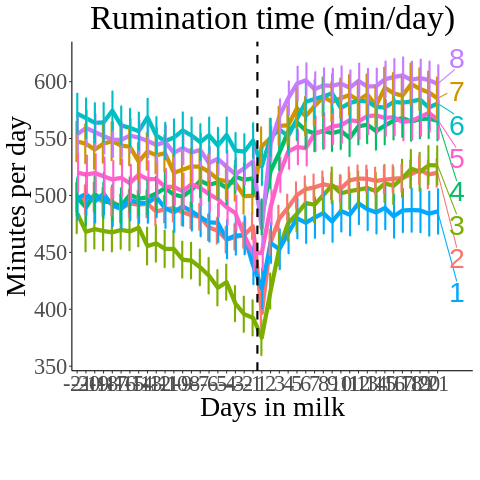

In [16]:
%%R
LSMs<-lsmeans::lsmeans(finalModel, pairwise ~ HerdIdentifier|DaysInMilk, type = "response", glhargs=list())
dfLMSs <- multcomp::cld(LSMs[[1]], alpha=0.05, Letters=letters, adjust="sidak")


p = dfLMSs %>%  mutate(label = if_else(DaysInMilk == max(as.numeric(DaysInMilk)),
                                                                    as.character(HerdIdentifier), NA_character_)) %>%
  ggplot(
  aes(
    x=DaysInMilk,
    y=emmean,
    group=HerdIdentifier,
    color=HerdIdentifier)
    ) +
    #scale_color_manual(values=group.colors)+
    #scale_fill_manual(values=group.colors)+
    geom_line(linewidth=2) +
    geom_text_repel(data= subset(dfLMSs,DaysInMilk == 21), aes(label =
                                 c("544" = "1",
                                  "2514" = "2",
                                  "3314" = "3",
                                  "2297" = "4",
                                  "5888" = "5",
                                  "3" = "6",
                                  "2011" = "7",
                                  "2746" = "8"),
                                 colour = HerdIdentifier,
                                 x = 42,
                                 y= emmean),hjust = -0.8, size = 10, nudge_x =4,box.padding = 0.5,direction = "y")+
    geom_errorbar(
    aes(ymin=asymp.LCL,
        ymax=asymp.UCL),
    width=0.25,
    linewidth=1,
    position=position_dodge(0.25)) +
  labs(
    title = "Rumination time (min/day)",
    y="Minutes per day" ,
    x = "Days in milk") +
  theme_bw() +
  theme(text = element_text(family = "Times New Roman"),plot.margin = unit(c(0.5,0.5,4,0.5), "lines")) +
  theme(text=element_text(size=28),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"))+
  theme (legend.position= "none")+
  geom_vline(xintercept = myLoc, size = 1, linetype= "dashed", color ="black")



gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)
ggsave(plot = gt,"/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Kemel2025a/Figures/Apendix/RuminationTimeHerdIdentifier.png", width = 24, height = 8)

## Parity

Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 97916' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 97916)' or larger];
but be warned that this may result in large computation time and memory use.
Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 97916' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 97916)' or larger];
but be warned that this may result in large computation time and memory use.


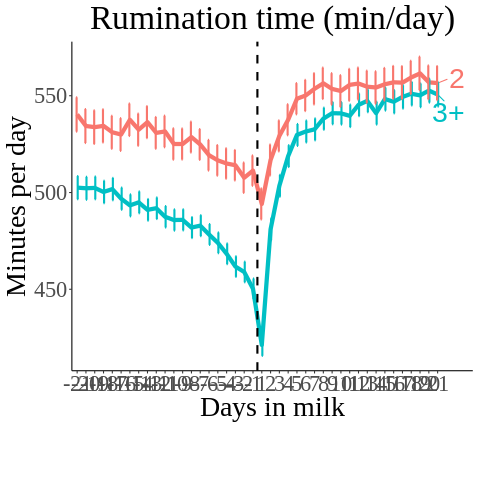

In [17]:
%%R
LSMs<-lsmeans::lsmeans(finalModel, pairwise ~ Parity|DaysInMilk, type = "response", glhargs=list())
dfLMSs <- multcomp::cld(LSMs[[1]], alpha=0.05, Letters=letters, adjust="sidak")


p = dfLMSs %>%  mutate(label = if_else(DaysInMilk == max(as.numeric(DaysInMilk)),
                                                                    as.character(Parity), NA_character_)) %>%
  ggplot(
  aes(
    x=DaysInMilk,
    y=emmean,
    group=Parity,
    color=Parity)
    ) +
    #scale_color_manual(values=group.colors)+
    #scale_fill_manual(values=group.colors)+
    geom_line(linewidth=2) +
    geom_text_repel(data= subset(dfLMSs,DaysInMilk == 21), aes(label = Parity, colour = Parity, x = 42, y= emmean),hjust = -0.8, size = 10, nudge_x =4,box.padding = 0.5,direction = "y")+
    geom_errorbar(
    aes(ymin=asymp.LCL,
        ymax=asymp.UCL),
    width=0.25,
    linewidth=1,
    position=position_dodge(0.25)) +
  labs(
    title = "Rumination time (min/day)",
    y="Minutes per day" ,
    x = "Days in milk") +
  theme_bw() +
  theme(text = element_text(family = "Times New Roman"),plot.margin = unit(c(0.5,0.5,4,0.5), "lines")) +
  theme(text=element_text(size=28),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"))+
  theme (legend.position= "none")+
  geom_vline(xintercept = myLoc, size = 1, linetype= "dashed", color ="black")



gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)

ggsave(plot = gt,"/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Kemel2025a/Figures/Apendix/RuminationTimeParity.png", width = 24, height = 8)

## CalvingSeason


Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 97916' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 97916)' or larger];
but be warned that this may result in large computation time and memory use.
Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 97916' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 97916)' or larger];
but be warned that this may result in large computation time and memory use.


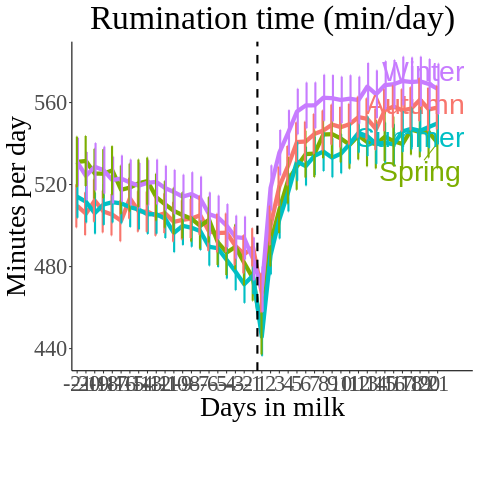

In [18]:
%%R
LSMs<-lsmeans::lsmeans(finalModel, pairwise ~ CalvingSeason|DaysInMilk, type = "response", glhargs=list())
dfLMSs <- multcomp::cld(LSMs[[1]], alpha=0.05, Letters=letters, adjust="sidak")


p = dfLMSs %>%  mutate(label = if_else(DaysInMilk == max(as.numeric(DaysInMilk)),
                                                                    as.character(CalvingSeason), NA_character_)) %>%
  ggplot(
  aes(
    x=DaysInMilk,
    y=emmean,
    group=CalvingSeason,
    color=CalvingSeason)
    ) +
    #scale_color_manual(values=group.colors)+
    #scale_fill_manual(values=group.colors)+
    geom_line(linewidth=2) +
    geom_text_repel(data= subset(dfLMSs,DaysInMilk == 21), aes(label = CalvingSeason, colour = CalvingSeason, x = 42, y= emmean),hjust = -0.8, size = 10, nudge_x =4,box.padding = 0.5,direction = "y")+
    geom_errorbar(
    aes(ymin=asymp.LCL,
        ymax=asymp.UCL),
    width=0.25,
    linewidth=1,
    position=position_dodge(0.25)) +
  labs(
    title = "Rumination time (min/day)",
    y="Minutes per day" ,
    x = "Days in milk") +
  theme_bw() +
  theme(text = element_text(family = "Times New Roman"),plot.margin = unit(c(0.5,0.5,4,0.5), "lines")) +
  theme(text=element_text(size=28),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"))+
  theme (legend.position= "none")+
  geom_vline(xintercept = myLoc, size = 1, linetype= "dashed", color ="black")



gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)

ggsave(plot = gt,"/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Kemel2025a/Figures/Apendix/RuminationTimeCalvingSeason.png", width = 24, height = 8)

#LyingTime

In [19]:
%%R
load(file="/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Kemel2025a/Models/finalmodelLyingtimeDaysInMilk.rdata")

## HerdIdentifier

Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 99899' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 99899)' or larger];
but be warned that this may result in large computation time and memory use.
Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 99899' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 99899)' or larger];
but be warned that this may result in large computation time and memory use.


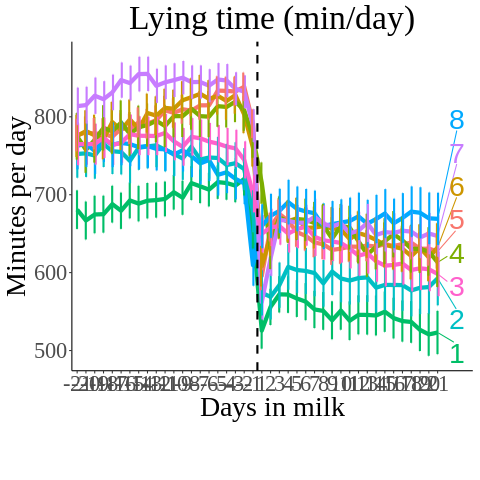

In [20]:
%%R
LSMs<-lsmeans::lsmeans(finalModel, pairwise ~ HerdIdentifier|DaysInMilk, type = "response", glhargs=list())
dfLMSs <- multcomp::cld(LSMs[[1]], alpha=0.05, Letters=letters, adjust="sidak")


p = dfLMSs %>%  mutate(label = if_else(DaysInMilk == max(as.numeric(DaysInMilk)),
                                                                    as.character(HerdIdentifier), NA_character_)) %>%
  ggplot(
  aes(
    x=DaysInMilk,
    y=emmean,
    group=HerdIdentifier,
    color=HerdIdentifier)
    ) +
    #scale_color_manual(values=group.colors)+
    #scale_fill_manual(values=group.colors)+
    geom_line(linewidth=2) +
    geom_text_repel(data= subset(dfLMSs,DaysInMilk == 21), aes(label =
                                 c("544" = "1",
                                  "2514" = "2",
                                  "3314" = "3",
                                  "2297" = "4",
                                  "5888" = "5",
                                  "3" = "6",
                                  "2011" = "7",
                                  "2746" = "8"),
                                 colour = HerdIdentifier,
                                 x = 42,
                                 y= emmean),hjust = -0.8, size = 10, nudge_x =4,box.padding = 0.5,direction = "y")+
    geom_errorbar(
    aes(ymin=asymp.LCL,
        ymax=asymp.UCL),
    width=0.25,
    linewidth=1,
    position=position_dodge(0.25)) +
  labs(
    title = "Lying time (min/day)",
    y="Minutes per day" ,
    x = "Days in milk") +
  theme_bw() +
  theme(text = element_text(family = "Times New Roman"),plot.margin = unit(c(0.5,0.5,4,0.5), "lines")) +
  theme(text=element_text(size=28),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"))+
  theme (legend.position= "none")+
  geom_vline(xintercept = myLoc, size = 1, linetype= "dashed", color ="black")



gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)
ggsave(plot = gt,"/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Kemel2025a/Figures/Apendix/LyingTimeHerdIdentifier.png", width = 24, height = 8)

## Parity


Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 99899' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 99899)' or larger];
but be warned that this may result in large computation time and memory use.
Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 99899' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 99899)' or larger];
but be warned that this may result in large computation time and memory use.


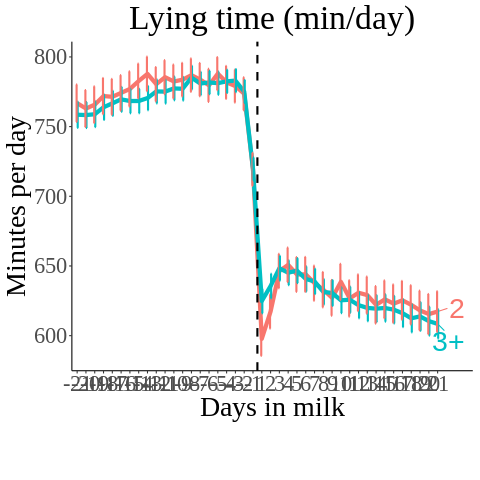

In [21]:
%%R
LSMs<-lsmeans::lsmeans(finalModel, pairwise ~ Parity|DaysInMilk, type = "response", glhargs=list())
dfLMSs <- multcomp::cld(LSMs[[1]], alpha=0.05, Letters=letters, adjust="sidak")


p = dfLMSs %>%  mutate(label = if_else(DaysInMilk == max(as.numeric(DaysInMilk)),
                                                                    as.character(Parity), NA_character_)) %>%
  ggplot(
  aes(
    x=DaysInMilk,
    y=emmean,
    group=Parity,
    color=Parity)
    ) +
    #scale_color_manual(values=group.colors)+
    #scale_fill_manual(values=group.colors)+
    geom_line(linewidth=2) +
    geom_text_repel(data= subset(dfLMSs,DaysInMilk == 21), aes(label = Parity, colour = Parity, x = 42, y= emmean),hjust = -0.8, size = 10, nudge_x =4,box.padding = 0.5,direction = "y")+
    geom_errorbar(
    aes(ymin=asymp.LCL,
        ymax=asymp.UCL),
    width=0.25,
    linewidth=1,
    position=position_dodge(0.25)) +
  labs(
    title = "Lying time (min/day)",
    y="Minutes per day" ,
    x = "Days in milk") +
  theme_bw() +
  theme(text = element_text(family = "Times New Roman"),plot.margin = unit(c(0.5,0.5,4,0.5), "lines")) +
  theme(text=element_text(size=28),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"))+
  theme (legend.position= "none")+
  geom_vline(xintercept = myLoc, size = 1, linetype= "dashed", color ="black")



gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)

ggsave(plot = gt,"/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Kemel2025a/Figures/Apendix/LyingTimeParity.png", width = 24, height = 8)

## CalvingSeason

Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 99899' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 99899)' or larger];
but be warned that this may result in large computation time and memory use.
Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 99899' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 99899)' or larger];
but be warned that this may result in large computation time and memory use.


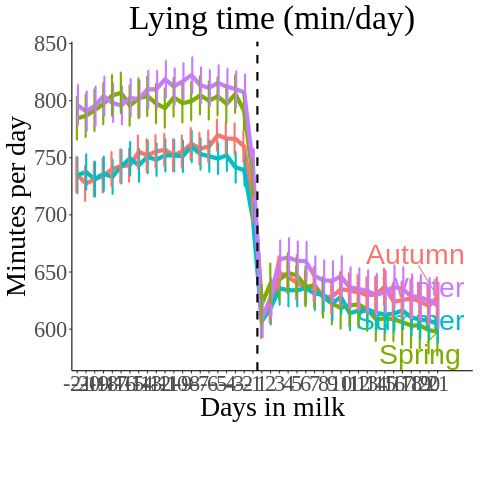

In [22]:
%%R
LSMs<-lsmeans::lsmeans(finalModel, pairwise ~ CalvingSeason|DaysInMilk, type = "response", glhargs=list())
dfLMSs <- multcomp::cld(LSMs[[1]], alpha=0.05, Letters=letters, adjust="sidak")


p = dfLMSs %>%  mutate(label = if_else(DaysInMilk == max(as.numeric(DaysInMilk)),
                                                                    as.character(CalvingSeason), NA_character_)) %>%
  ggplot(
  aes(
    x=DaysInMilk,
    y=emmean,
    group=CalvingSeason,
    color=CalvingSeason)
    ) +
    #scale_color_manual(values=group.colors)+
    #scale_fill_manual(values=group.colors)+
    geom_line(linewidth=2) +
    geom_text_repel(data= subset(dfLMSs,DaysInMilk == 21), aes(label = CalvingSeason, colour = CalvingSeason, x = 42, y= emmean),hjust = -0.8, size = 10, nudge_x =4,box.padding = 0.5,direction = "y")+
    geom_errorbar(
    aes(ymin=asymp.LCL,
        ymax=asymp.UCL),
    width=0.25,
    linewidth=1,
    position=position_dodge(0.25)) +
  labs(
    title = "Lying time (min/day)",
    y="Minutes per day" ,
    x = "Days in milk") +
  theme_bw() +
  theme(text = element_text(family = "Times New Roman"),plot.margin = unit(c(0.5,0.5,4,0.5), "lines")) +
  theme(text=element_text(size=28),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"))+
  theme (legend.position= "none")+
  geom_vline(xintercept = myLoc, size = 1, linetype= "dashed", color ="black")



gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)

ggsave(plot = gt,"/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Kemel2025a/Figures/Apendix/LyingTimeCalvingSeason.png", width = 24, height = 8)

#StandingTime

In [23]:
%%R
load(file="/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Kemel2025a/Models/finalmodelStandingTimeDaysInMilk.rdata")

## HerdIdentifier

Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 97916' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 97916)' or larger];
but be warned that this may result in large computation time and memory use.
Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 97916' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 97916)' or larger];
but be warned that this may result in large computation time and memory use.


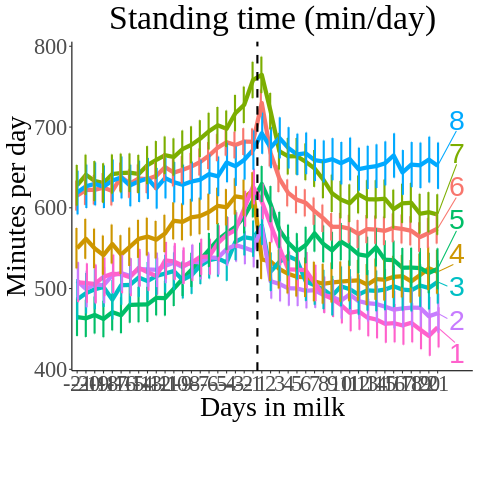

In [24]:
%%R
LSMs<-lsmeans::lsmeans(finalModel, pairwise ~ HerdIdentifier|DaysInMilk, type = "response", glhargs=list())
dfLMSs <- multcomp::cld(LSMs[[1]], alpha=0.05, Letters=letters, adjust="sidak")


p = dfLMSs %>%  mutate(label = if_else(DaysInMilk == max(as.numeric(DaysInMilk)),
                                                                    as.character(HerdIdentifier), NA_character_)) %>%
  ggplot(
  aes(
    x=DaysInMilk,
    y=emmean,
    group=HerdIdentifier,
    color=HerdIdentifier)
    ) +
    #scale_color_manual(values=group.colors)+
    #scale_fill_manual(values=group.colors)+
    geom_line(linewidth=2) +
        geom_text_repel(data= subset(dfLMSs,DaysInMilk == 21), aes(label =
                                 c("544" = "1",
                                  "2514" = "2",
                                  "3314" = "3",
                                  "2297" = "4",
                                  "5888" = "5",
                                  "3" = "6",
                                  "2011" = "7",
                                  "2746" = "8"),
                                 colour = HerdIdentifier,
                                 x = 42,
                                 y= emmean),hjust = -0.8, size = 10, nudge_x =4,box.padding = 0.5,direction = "y")+
    geom_errorbar(
    aes(ymin=asymp.LCL,
        ymax=asymp.UCL),
    width=0.25,
    linewidth=1,
    position=position_dodge(0.25)) +
  labs(
    title = "Standing time (min/day)",
    y="Minutes per day" ,
    x = "Days in milk") +
  theme_bw() +
  theme(text = element_text(family = "Times New Roman"),plot.margin = unit(c(0.5,0.5,4,0.5), "lines")) +
  theme(text=element_text(size=28),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"))+
  theme (legend.position= "none")+
  geom_vline(xintercept = myLoc, size = 1, linetype= "dashed", color ="black")



gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)
ggsave(plot = gt,"/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Kemel2025a/Figures/Apendix/StandingTimeHerdIdentifier.png", width = 24, height = 8)

## Parity

Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 97916' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 97916)' or larger];
but be warned that this may result in large computation time and memory use.
Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 97916' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 97916)' or larger];
but be warned that this may result in large computation time and memory use.


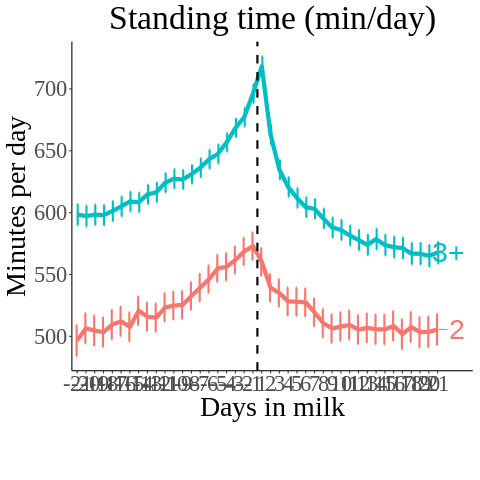

In [25]:
%%R
LSMs<-lsmeans::lsmeans(finalModel, pairwise ~ Parity|DaysInMilk, type = "response", glhargs=list())
dfLMSs <- multcomp::cld(LSMs[[1]], alpha=0.05, Letters=letters, adjust="sidak")


p = dfLMSs %>%  mutate(label = if_else(DaysInMilk == max(as.numeric(DaysInMilk)),
                                                                    as.character(Parity), NA_character_)) %>%
  ggplot(
  aes(
    x=DaysInMilk,
    y=emmean,
    group=Parity,
    color=Parity)
    ) +
    #scale_color_manual(values=group.colors)+
    #scale_fill_manual(values=group.colors)+
    geom_line(linewidth=2) +
    geom_text_repel(data= subset(dfLMSs,DaysInMilk == 21), aes(label = Parity, colour = Parity, x = 42, y= emmean),hjust = -0.8, size = 10, nudge_x =4,box.padding = 0.5,direction = "y")+
    geom_errorbar(
    aes(ymin=asymp.LCL,
        ymax=asymp.UCL),
    width=0.25,
    linewidth=1,
    position=position_dodge(0.25)) +
  labs(
    title = "Standing time (min/day)",
    y="Minutes per day" ,
    x = "Days in milk") +
  theme_bw() +
  theme(text = element_text(family = "Times New Roman"),plot.margin = unit(c(0.5,0.5,4,0.5), "lines")) +
  theme(text=element_text(size=28),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"))+
  theme (legend.position= "none")+
  geom_vline(xintercept = myLoc, size = 1, linetype= "dashed", color ="black")



gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)

ggsave(plot = gt,"/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Kemel2025a/Figures/Apendix/StandingTimeParity.png", width = 24, height = 8)

## CalvingSeason

Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 97916' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 97916)' or larger];
but be warned that this may result in large computation time and memory use.
Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 97916' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 97916)' or larger];
but be warned that this may result in large computation time and memory use.


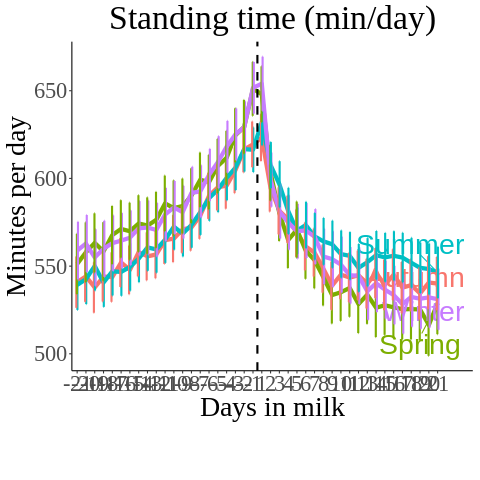

In [26]:
%%R
LSMs<-lsmeans::lsmeans(finalModel, pairwise ~ CalvingSeason|DaysInMilk, type = "response", glhargs=list())
dfLMSs <- multcomp::cld(LSMs[[1]], alpha=0.05, Letters=letters, adjust="sidak")


p = dfLMSs %>%  mutate(label = if_else(DaysInMilk == max(as.numeric(DaysInMilk)),
                                                                    as.character(CalvingSeason), NA_character_)) %>%
  ggplot(
  aes(
    x=DaysInMilk,
    y=emmean,
    group=CalvingSeason,
    color=CalvingSeason)
    ) +
    #scale_color_manual(values=group.colors)+
    #scale_fill_manual(values=group.colors)+
    geom_line(linewidth=2) +
    geom_text_repel(data= subset(dfLMSs,DaysInMilk == 21), aes(label = CalvingSeason, colour = CalvingSeason, x = 42, y= emmean),hjust = -0.8, size = 10, nudge_x =4,box.padding = 0.5,direction = "y")+
    geom_errorbar(
    aes(ymin=asymp.LCL,
        ymax=asymp.UCL),
    width=0.25,
    linewidth=1,
    position=position_dodge(0.25)) +
  labs(
    title = "Standing time (min/day)",
    y="Minutes per day" ,
    x = "Days in milk") +
  theme_bw() +
  theme(text = element_text(family = "Times New Roman"),plot.margin = unit(c(0.5,0.5,4,0.5), "lines")) +
  theme(text=element_text(size=28),
        plot.title = element_text(hjust = 0.5),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"))+
  theme (legend.position= "none")+
  geom_vline(xintercept = myLoc, size = 1, linetype= "dashed", color ="black")



gt <- ggplotGrob(p)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)

ggsave(plot = gt,"/content/drive/Shareddrives/Bovi-Analytics/Projects/CelienKemel/Kemel2025a/Figures/Apendix/StandingTimeCalvingSeason.png", width = 24, height = 8)
